# K-means Clustering 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<a name="1.1"></a>
### Finding closest centroids

In the “cluster assignment” phase of the K-means algorithm, the
algorithm assigns every training example $x^{(i)}$ to its closest
centroid, given the current positions of centroids. 

* This function takes the data matrix `X` and the locations of all
centroids inside `centroids` 
* It should output a one-dimensional array `idx` (which has the same number of elements as `X`) that holds the index  of the closest centroid (a value in $\{0,...,K-1\}$, where $K$ is total number of centroids) to every training example . *(Note: The index range 0 to K-1 varies slightly from what is shown in the lectures (i.e. 1 to K) because Python list indices start at 0 instead of 1)*
* Specifically, for every example $x^{(i)}$ we set
$$c^{(i)} := j \quad \mathrm{that \; minimizes} \quad ||x^{(i)} - \mu_j||^2,$$
where 
 * $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$ (corresponds to `idx[i]` in the starter code), and 
 * $\mu_j$ is the position (value) of the $j$’th centroid. (stored in `centroids` in the starter code)
 * $||x^{(i)} - \mu_j||$ is the L2-norm
 

In [3]:
def find_closest_centroids(X, centroids):
    # Number of centroids (K) is the number of rows in the centroids array
    K = centroids.shape[0]

    # Number of data points in X (m)
    m = X.shape[0]
    
    # Initialize an array to store the index of the closest centroid for each data point
    c_idx = np.zeros(m, dtype=int)

    # Loop through each data point in X
    for i in range(m):
        # Initialize a list to hold the distances from the current data point to each centroid
        distances = []
        # Loop through each centroid
        for j in range(K):
            # Calculate the distance (L2 norm) between data point i and centroid j
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            # Add this distance to the distances list
            distances.append(norm_ij)
        # Find the index of the minimum distance in distances (closest centroid)
        c_idx[i] = np.argmin(distances)

    # Return an array with the index of the closest centroid for each data point
    return c_idx

In [4]:
X = np.load('./ex7_X.npy')

In [5]:
print("First five elements of X are:\n", X[:5]) 
print('The shape of X is:', X.shape)

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)


In [5]:
# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Find closest centroids using initial_centroids
c_idx = find_closest_centroids(X, initial_centroids)

# Print closest centroids for the first three elements
print("First three elements in idx are:", c_idx[:3])

First three elements in idx are: [0 2 1]


### Computing centroid means

Given assignments of every point to a centroid, the second phase of the
algorithm recomputes, for each centroid, the mean of the points that
were assigned to it.

* Specifically, for every centroid $\mu_k$ we set
$$\mu_k = \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}$$ 

    where 
    * $C_k$ is the set of examples that are assigned to centroid $k$
    * $|C_k|$ is the number of examples in the set $C_k$


* Concretely, if two examples say $x^{(3)}$ and $x^{(5)}$ are assigned to centroid $k=2$,
then you should update $\mu_2 = \frac{1}{2}(x^{(3)}+x^{(5)})$.

In [14]:
def compute_centroids(X, c_idx, K):
    # Get the number of data points (m) and the number of features (n) in X
    m, n = X.shape
    
    # Create an array to store the centroids, initialized to zeros
    centroids = np.zeros((K, n))

    # Loop through each centroid (k)
    for k in range(K):
        # Select the data points that belong to the current centroid (k)
        points = X[c_idx == k]

        if points.size > 0:
            # Calculate the mean (average) of these points and assign it as the new centroid
            centroids[k] = np.mean(points, axis=0)
        else:
             print(f"Centroid {k} has no points assigned.")

    # Return the updated centroids
    return centroids

In [11]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)

The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


In [7]:
def kMeans(X, initial_centroids, max_iters):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    c_idx = np.zeros(m)

    for i in range(max_iters):
        c_idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, c_idx, K)

    return centroids, c_idx

In [63]:
# Set initial centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])

# Number of iterations
max_iters = 10

# Run K-Means
centroids, idx = kMeans(X, initial_centroids, max_iters)

[[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]


In [8]:
def kMeans_init_centroids(X, K):
    # Randomly shuffle the indices of the data points in X
    randidx = np.random.permutation(X.shape[0])
    
    # Select the first K indices from the shuffled indices to initialize centroids
    centroids = X[randidx[:K]]
    
    # Return the initialized centroids
    return centroids

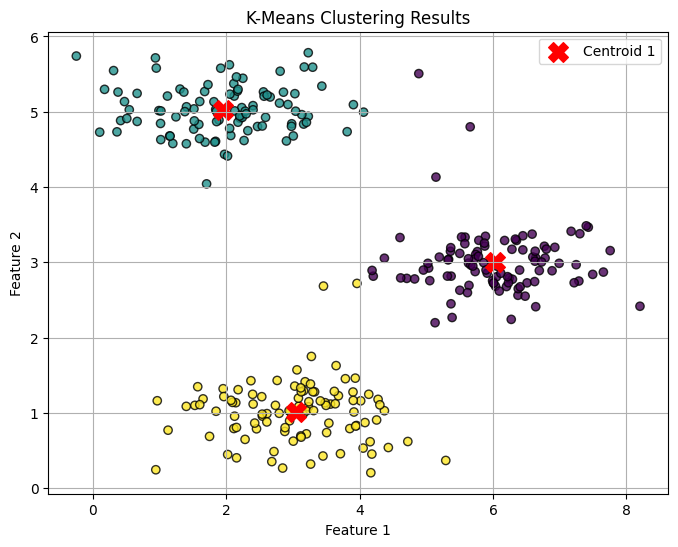

Final Centroids:
 [[6.03366736 3.00052511]
 [1.95399466 5.02557006]
 [3.04367119 1.01541041]]


In [9]:
# Set number of centroids and max number of iterations
K = 3
max_iters = 10

# Set initial centroids by picking random examples from the dataset
initial_centroids = kMeans_init_centroids(X, K)

# Run K-Means
centroids, idx = kMeans(X, initial_centroids, max_iters)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=idx, cmap='viridis', alpha=0.8, edgecolors='k')

# All Plots
plots = []

# Plot the centroids
for i in range(centroids.shape[0]):
    plot = plt.scatter(centroids[i, 0], centroids[i, 1], marker='X', color='red', s=200, label=f'Centroid {i + 1}' if i == 0 else "")
    plots.append(plot)

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering Results')
plt.legend()
plt.grid(True)
plt.show()

# Print final centroids
print("Final Centroids:\n", centroids)

## Image compression with K-means

* In a straightforward 24-bit color representation of an image$^{2}$, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding.
* Our image contains thousands of colors, and in this part of the exercise, you will reduce the number of
colors to 16 colors.
* By making this reduction, it is possible to represent (compress) the photo in an efficient way. 
* Specifically, you only need to store the RGB values of the 16 selected colors, and for each pixel in the image you now need to only store the index of the color at that location (where only 4 bits are necessary to represent 16 possibilities).

In this part, you will use the K-means algorithm to select the 16 colors that will be used to represent the compressed image.
* Concretely, you will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3- dimensional RGB space.
* Once you have computed the cluster centroids on the image, you will then use the 16 colors to replace the pixels in the original image.

In [10]:
# Load an image of a bird
original_img = plt.imread('bird.png')

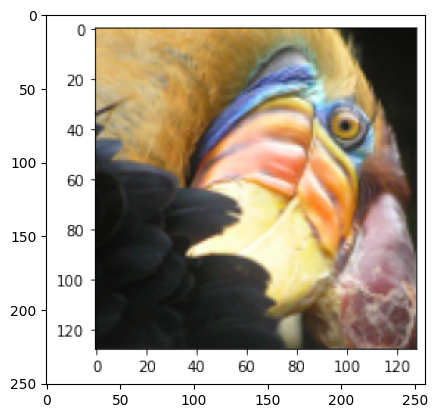

In [53]:
plt.imshow(original_img)

In [42]:
original_img[:5]

array([[[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]]], dtype=float32)

In [54]:
original_img.shape

(251, 257, 4)

Original image shape: (251, 257, 4)
Image dimensions - Height: 251, Width: 257, Channels: 3
Reshaped image data dimensions: (64507, 3)


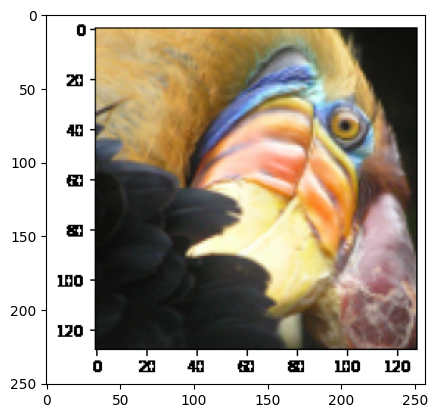

In [11]:
# Divide by 255 so that all values are in the range 0 - 1 (not needed for PNG files)
# original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

# Check the shape of the original image
print("Original image shape:", original_img.shape)  # Should print (251, 257, 4)

# Convert to RGB by taking the first three channels
if original_img.shape[2] == 4:
    original_img = original_img[:, :, :3]  # Keep only the R, G, and B channels


plt.imshow(original_img)

# Get the dimensions of the original image
m, n, c = original_img.shape  # height, width, channels
print(f"Image dimensions - Height: {m}, Width: {n}, Channels: {c}")

# Reshape the image into an m * n x 3 matrix
X_img = original_img.reshape(m * n, 3)

# Optional: Print the shape of X_img to verify the reshaping
print(f"Reshaped image data dimensions: {X_img.shape}")  # Should be (m*n, 3)

In [15]:
K = 16
max_iters = 10

initial_centroids = kMeans_init_centroids(X_img, K)

centroids, c_idx = kMeans(X_img, initial_centroids, max_iters)

Centroid 10 has no points assigned.
Centroid 13 has no points assigned.
Centroid 13 has no points assigned.


In [17]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (300,)
Closest centroid for the first five elements: [1 0 0 1 1]


In [18]:
# Find the closest centroid of each pixel
idx = find_closest_centroids(X_img, centroids)

# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :] 

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

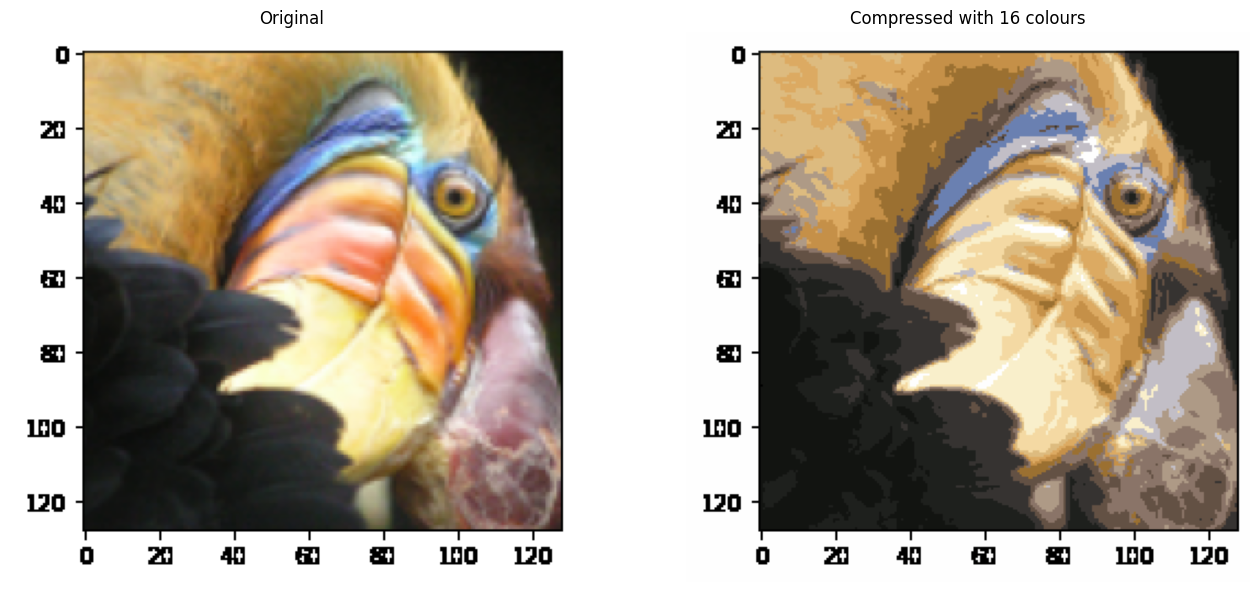

In [19]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()